# Customer Segmentation Analysis

In [1]:
import numpy as np 
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


We can combine the 2 dataframes and tell the original dataframes apart with 1s and 0s

In [5]:
train['train_y_n']=1
test['train_y_n']=0
all=pd.concat([train,test])

In [7]:
all.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


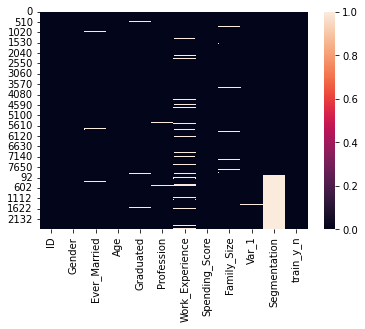

In [8]:
sns.heatmap(all.isna())

In [9]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
 11  train_y_n        10695 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.1+ MB


In [10]:
all.describe()

,ID,Age,Work_Experience,Family_Size,train_y_n
count,10695.000000,10695.000000,9597.000000,10247.000000,10695.000000
mean,463468.088640,43.511828,2.619777,2.844052,0.754371
std,2600.966411,16.774158,3.390790,1.536427,0.430480
min,458982.000000,18.000000,0.000000,1.000000,0.000000
25%,461220.500000,30.000000,0.000000,2.000000,1.000000
50%,463451.000000,41.000000,1.000000,3.000000,1.000000
75%,465733.500000,53.000000,4.000000,4.000000,1.000000
max,467974.000000,89.000000,14.000000,9.000000,1.000000


## EDA

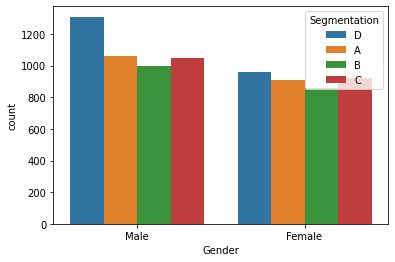

In [15]:
sns.countplot(all['Gender'],hue=all['Segmentation'])

In [17]:
groupby_df = all[all['train_y_n']==1].groupby(['Gender', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
print(groupby_df,groupby_pcts)

                     Segmentation
Gender Segmentation              
Female A                      909
       B                      861
       C                      922
       D                      959
Male   A                     1063
       B                      997
       C                     1048
       D                     1309                      Segmentation
Gender Segmentation              
Female A                    24.90
       B                    23.58
       C                    25.25
       D                    26.27
Male   A                    24.07
       B                    22.57
       C                    23.73
       D                    29.64


No significant differences...

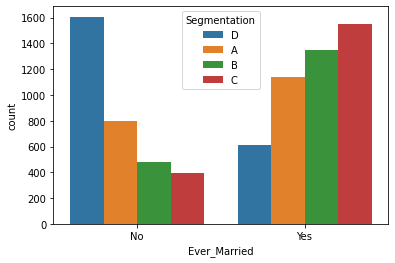

In [18]:
sns.countplot(all['Ever_Married'],hue=all['Segmentation'])

In [19]:
groupby_df = all[all['train_y_n']==1].groupby(['Ever_Married', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                           Segmentation
 Ever_Married Segmentation              
 No           A                      801
              B                      479
              C                      398
              D                     1607
 Yes          A                     1137
              B                     1348
              C                     1549
              D                      609,
                            Segmentation
 Ever_Married Segmentation              
 No           A                    24.38
              B                    14.58
              C                    12.12
              D                    48.92
 Yes          A                    24.49
              B                    29.03
              C                    33.36
              D                    13.12)

Groups A,B, and C have more married people while group D has more single people

In [20]:
sum(all['Ever_Married'].isnull())

190

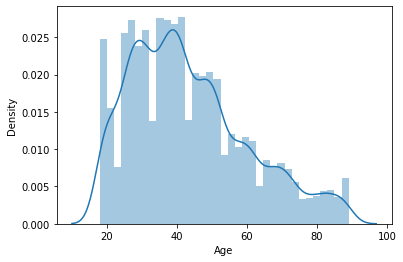

In [21]:
sns.distplot(all['Age'])

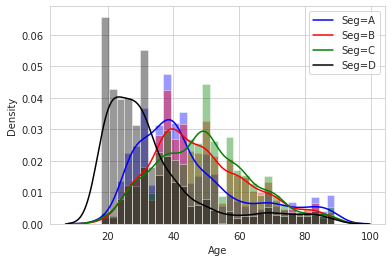

In [22]:
sns.set_style('whitegrid')
sns.distplot(all[all['Segmentation']=='A']['Age'],bins=30,color='blue')
sns.distplot(all[all['Segmentation']=='B']['Age'],bins=30,color='red')
sns.distplot(all[all['Segmentation']=='C']['Age'],bins=30,color='green')
sns.distplot(all[all['Segmentation']=='D']['Age'],bins=30,color='black')
plt.legend(labels=['Seg=A', 'Seg=B', 'Seg=C','Seg=D'])

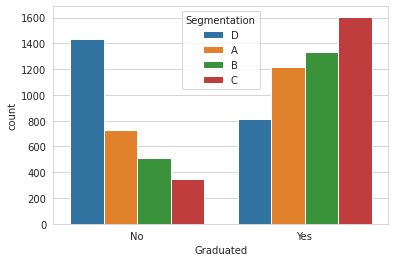

In [23]:
sns.countplot(all['Graduated'],hue=all['Segmentation'])

In [24]:
groupby_df = all[all['train_y_n']==1].groupby(['Graduated', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                        Segmentation
 Graduated Segmentation              
 No        A                      729
           B                      508
           C                      348
           D                     1437
 Yes       A                     1219
           B                     1332
           C                     1607
           D                      810,                         Segmentation
 Graduated Segmentation              
 No        A                    24.12
           B                    16.81
           C                    11.52
           D                    47.55
 Yes       A                    24.54
           B                    26.81
           C                    32.35
           D                    16.30)

There are more graduates in groups A, B, and C while D has fewer graduates

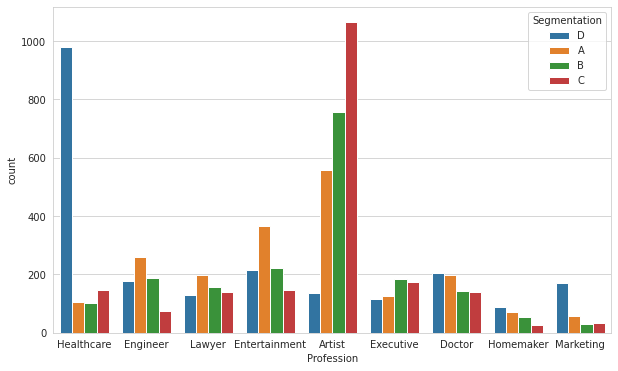

In [25]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(all['Profession'],hue=all['Segmentation'])

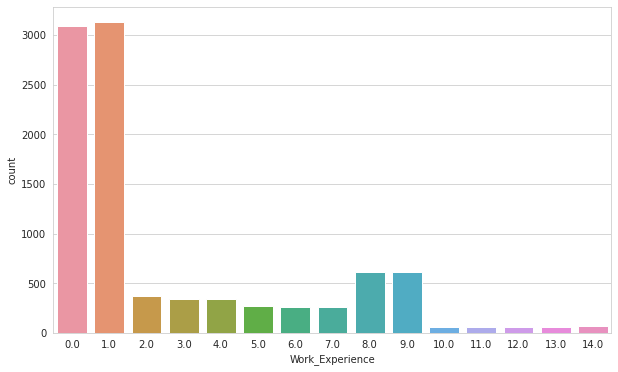

In [26]:
sns.countplot(all['Work_Experience'])

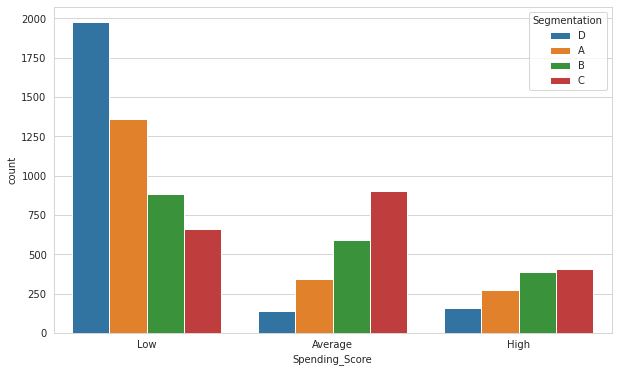

In [27]:
sns.countplot(all['Spending_Score'],hue=all['Segmentation'])

In [28]:
groupby_df = all[all['train_y_n']==1].groupby(['Spending_Score', 'Segmentation']).agg({'Segmentation': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                             Segmentation
 Spending_Score Segmentation              
 Average        A                      343
                B                      590
                C                      903
                D                      138
 High           A                      271
                B                      384
                C                      405
                D                      156
 Low            A                     1358
                B                      884
                C                      662
                D                     1974,
                              Segmentation
 Spending_Score Segmentation              
 Average        A                    17.38
                B                    29.89
                C                    45.74
                D                     6.99
 High           A                    22.29
                B                    31.58
                C                    33.31
          

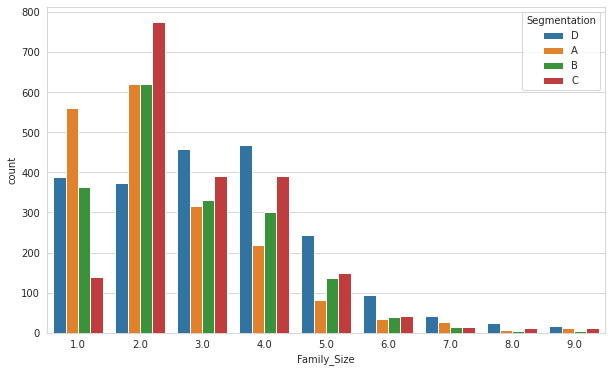

In [29]:
sns.countplot(all['Family_Size'],hue=all['Segmentation'])

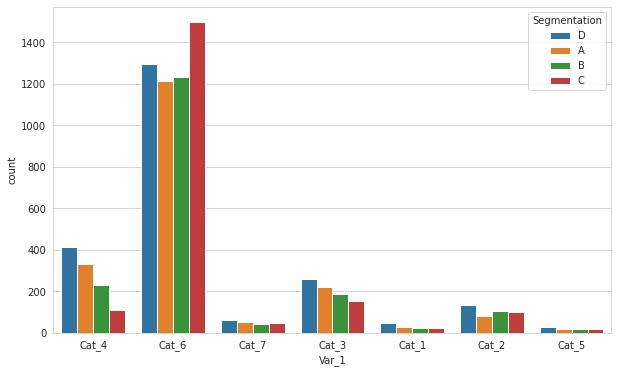

In [30]:
sns.countplot(all['Var_1'],hue=all['Segmentation'])

In [31]:
all.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
train_y_n            int64
dtype: object

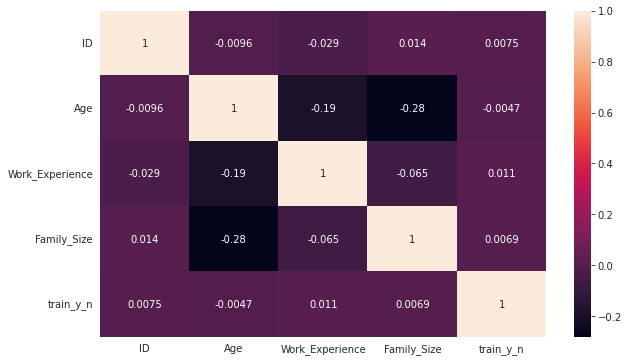

In [32]:
sns.heatmap(all.corr(),annot=True)

## Data Preprocessing and Feature Engineering

In [33]:
feature_cols = all.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols.remove('train_y_n')
label_col = 'Segmentation'
print(feature_cols)

['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']


In [34]:
all.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
train_y_n             0
dtype: int64

In [35]:
all=pd.get_dummies(all,prefix='Gender',columns=['Gender'],drop_first=True)

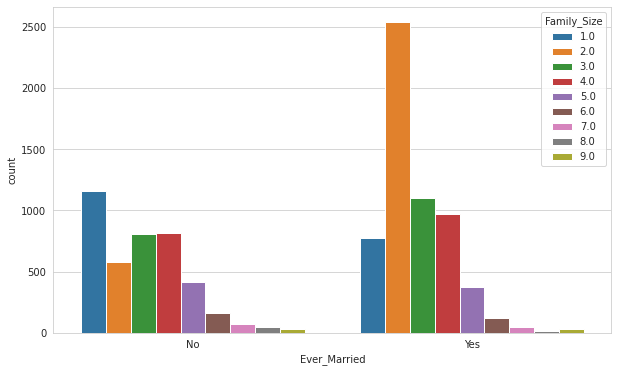

In [37]:
sns.countplot(all['Ever_Married'],hue=all['Family_Size'])

People who have been married should have families

In [38]:
all[all['Ever_Married'].isnull()]['Family_Size'].value_counts()

3.0    45
2.0    40
1.0    34
4.0    32
5.0    17
6.0     5
8.0     2
7.0     1
Name: Family_Size, dtype: int64

In [39]:
all['Ever_Married']=all['Ever_Married'].fillna('Yes')

In [40]:
all=pd.get_dummies(all,prefix='Married',columns=['Ever_Married'],drop_first=True)

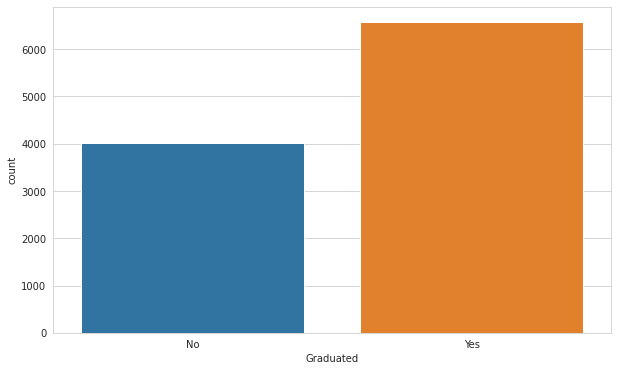

In [41]:
sns.countplot(all['Graduated'])

In [42]:
all['Graduated']=all['Graduated'].fillna('Yes')

In [43]:
all=pd.get_dummies(all,prefix='Graduated',columns=['Graduated'],drop_first=True)

In [45]:
all['Profession'].fillna('Unknown',inplace=True)

In [46]:
all['Profession']=all['Profession'].astype('str')

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
all['Profession_en']=le.fit_transform(all['Profession'])

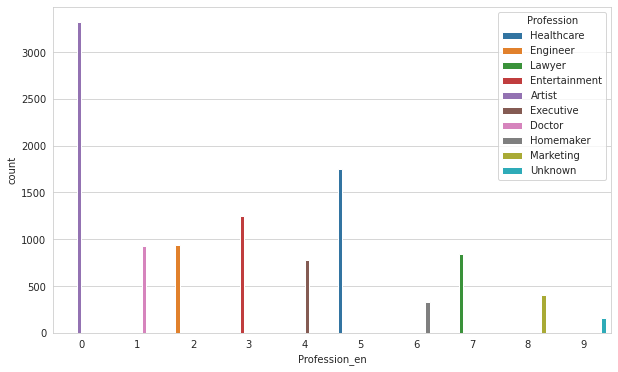

In [48]:
sns.countplot(all['Profession_en'],hue=all['Profession'])

In [49]:
all.drop('Profession',axis=1,inplace=True)

In [50]:
all['Work_Experience'].fillna(all['Work_Experience'].mean(),inplace=True)

In [51]:
all.loc[all['Spending_Score']=='Low','Spending_Score']=1
all.loc[all['Spending_Score']=='Average','Spending_Score']=2
all.loc[all['Spending_Score']=='High','Spending_Score']=3
all['Spending_Score']=all['Spending_Score'].astype('int')


In [52]:
all['Family_Size'].fillna(round(all['Family_Size'].mean()),inplace=True)

In [53]:
all['Var_1'].fillna('Cat_6',inplace=True)
all['Var_1']=all['Var_1'].apply(lambda x:x[-1])
all['Var_1']=all['Var_1'].astype('int')

In [54]:
from sklearn.model_selection import train_test_split
df_train, df_eval = train_test_split(all[all['train_y_n']==1], test_size=0.40, random_state=101, shuffle=True, stratify=all[all['train_y_n']==1][label_col])

In [55]:
le = preprocessing.LabelEncoder()
df_train['Segmentation']=le.fit_transform(df_train['Segmentation'])
df_eval['Segmentation']=le.fit_transform(df_eval['Segmentation'])

## Modeling

In [56]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter
sns.set_style('whitegrid')

In [58]:
params = {}
params['learning_rate'] = 0.04
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11

In [59]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols.remove('train_y_n')
label_col = 'Segmentation'
print(feature_cols)

['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Gender_Male', 'Married_Yes', 'Graduated_Yes', 'Profession_en']


In [60]:
cat_cols=['Spending_Score','Family_Size','Var_1','Gender_Male','Married_Yes','Graduated_Yes','Profession_en']

In [62]:
clf = lgb.LGBMClassifier(**params)
    
clf.fit(df_train[feature_cols], df_train[label_col], early_stopping_rounds=100, eval_set=[(df_train[feature_cols], df_train[label_col]), (df_eval[feature_cols], df_eval[label_col])], eval_metric='multi_error', verbose=True, categorical_feature=cat_cols)

eval_score = accuracy_score(df_eval[label_col], clf.predict(df_eval[feature_cols]))

print('Eval ACC: {}'.format(eval_score))

[1]	valid_0's multi_error: 0.719008	valid_0's multi_logloss: 1.36928	valid_1's multi_error: 0.718711	valid_1's multi_logloss: 1.36994
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_error: 0.692562	valid_0's multi_logloss: 1.35576	valid_1's multi_error: 0.696097	valid_1's multi_logloss: 1.35788
[3]	valid_0's multi_error: 0.625207	valid_0's multi_logloss: 1.34239	valid_1's multi_error: 0.630731	valid_1's multi_logloss: 1.34583
[4]	valid_0's multi_error: 0.591942	valid_0's multi_logloss: 1.3287	valid_1's multi_error: 0.598823	valid_1's multi_logloss: 1.33322
[5]	valid_0's multi_error: 0.560331	valid_0's multi_logloss: 1.31858	valid_1's multi_error: 0.574969	valid_1's multi_logloss: 1.32373
[6]	valid_0's multi_error: 0.528306	valid_0's multi_logloss: 1.30797	valid_1's multi_error: 0.54368	valid_1's multi_logloss: 1.31407
[7]	valid_0's multi_error: 0.498347	valid_0's multi_logloss: 1.29648	valid_1's multi_error: 0.523854	valid_1's multi_logloss: 1.30353
[

The model achieved about a 54% accuracy which is relatively poor but drastically better than FOLD-RM. Customer Segmentation is a difficult problem that may require more complex models and feature engineering. 